In [1]:
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
import uproot
from tqdm import tqdm

In [3]:
list_dir = os.listdir("/users/wonsang1995/CWDataDir_ver0_2021_Cf_1226_delayed/v3/comb/FN/")
# list_dir = os.listdir("/users/wonsang1995/CWDataDir_ver0_2021_Cf_1226_prompt/v3/comb/FN/")

In [4]:
energy_all=[]
x_all=[]
y_all=[]
z_all=[]
dT_all = []
dV_all = []
Dir = "/users/wonsang1995/CWDataDir_ver0_2021_Cf_1226_delayed/v3/comb/FN/"
# Dir = "/users/wonsang1995/CWDataDir_ver0_2021_Cf_1226_prompt/v3/comb/FN/"
for filename in tqdm(list_dir):
#     if filename.split('.')[2][3:] != '1521': continue
    fin = uproot.open(Dir+filename)
    energy = np.array(fin['comTree']['RecoFlux'])/(4428/8)
    vtx = np.array(fin['comTree']['RecoVertex']).T
    dT = np.array(fin['comTree']['Var1'])
    dV = np.array(fin['comTree']['Var2'])
    energy_all.append(energy)
    x_all.append(vtx[0])
    y_all.append(vtx[1])
    z_all.append(vtx[2])
    dT_all.append(dT)
    dV_all.append(dV)
energy_all=np.concatenate(energy_all)
x_all=np.concatenate(x_all)
y_all=np.concatenate(y_all)
z_all=np.concatenate(z_all)
dT_all=np.concatenate(dT_all)
dV_all=np.concatenate(dV_all)

100%|██████████| 689/689 [00:38<00:00, 17.96it/s]


In [22]:
fin

<ReadOnlyDirectory '/' at 0x7f3961caee50>

In [16]:
cut = np.abs(z_all)<1.25

In [18]:
print(energy_all.shape)
print(energy_all[cut].shape)

(50750,)
(49577,)


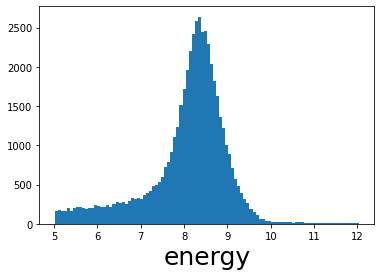

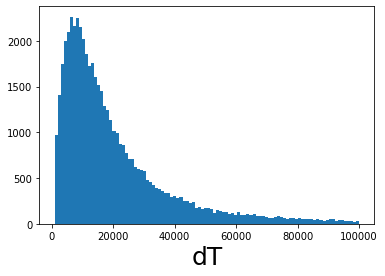

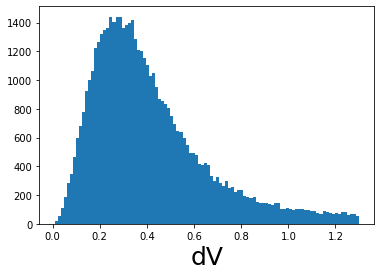

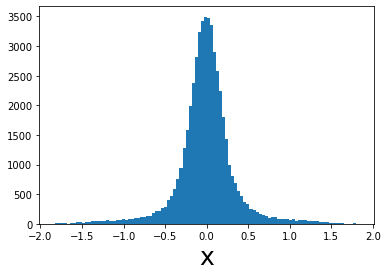

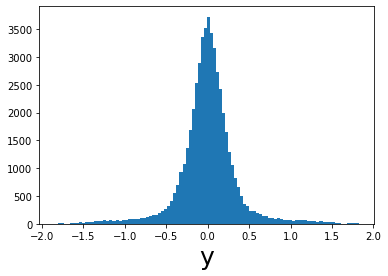

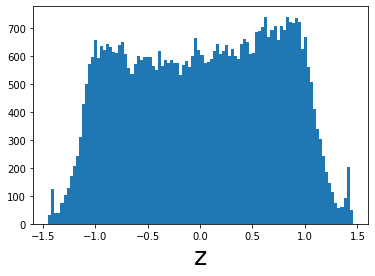

In [19]:
plt.hist(energy_all,bins=100)
plt.xlabel('energy',fontsize=25)
plt.show()

plt.hist(dT_all,bins=100)
plt.xlabel('dT',fontsize=25)
plt.show()

plt.hist(dV_all,bins=100)
plt.xlabel('dV',fontsize=25)
plt.show()

plt.hist(x_all,bins=100)
plt.xlabel('x',fontsize = 25)
plt.show()

plt.hist(y_all,bins=100)
plt.xlabel('y',fontsize = 25)
plt.show()

plt.hist(z_all,bins=100)
plt.xlabel('z',fontsize = 25)
plt.show()

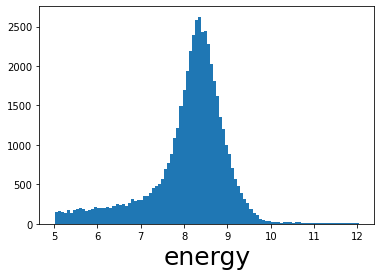

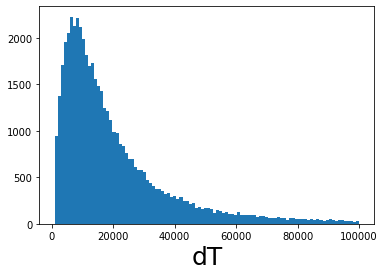

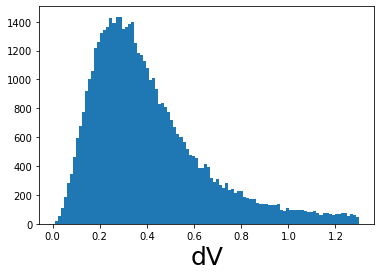

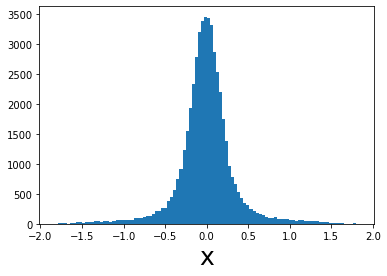

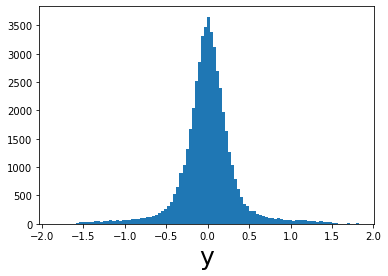

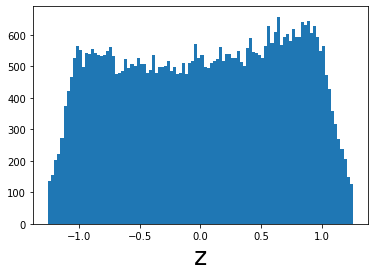

In [20]:
plt.hist(energy_all[cut],bins=100)
plt.xlabel('energy',fontsize=25)
plt.show()

plt.hist(dT_all[cut],bins=100)
plt.xlabel('dT',fontsize=25)
plt.show()

plt.hist(dV_all[cut],bins=100)
plt.xlabel('dV',fontsize=25)
plt.show()

plt.hist(x_all[cut],bins=100)
plt.xlabel('x',fontsize = 25)
plt.show()

plt.hist(y_all[cut],bins=100)
plt.xlabel('y',fontsize = 25)
plt.show()

plt.hist(z_all[cut],bins=100)
plt.xlabel('z',fontsize = 25)
plt.show()

In [7]:
fin.keys()

['comTree;1']

In [8]:
fin['comTree;1'].keys()

['TrigID',
 'EventID',
 'CorTrigID',
 'CorEventID',
 'CorRecoFlux',
 'CorRecoVertex',
 'Var1',
 'Var2',
 'Var3',
 'TotalCharge',
 'MaxCharge',
 'PMTHitFlag',
 'PMTCharge',
 'PMTTime',
 'RecoFlux',
 'RecoVertex',
 'RecoNumFunctionCalls',
 'RecoMinValue',
 'mVcomspAlign',
 'LeastChi2',
 'LeastdT',
 'AlignFactor']

In [9]:
np.array(fin['comTree;1']['PMTCharge']).shape

(84, 96)

In [10]:
np.array(fin['comTree;1']['RecoVertex']).shape

(84, 3)

In [11]:
np.array(fin['comTree;1']['RecoFlux']).shape

(84,)

In [12]:
np.array(fin['comTree;1']['RecoFlux'])/(4428/8)

array([ 9.003436 ,  9.425391 ,  7.4791155,  8.2028265, 10.075119 ,
        7.894667 ,  8.224106 ,  8.685161 ,  9.081461 ,  8.666192 ,
        8.026169 ,  8.468358 ,  8.995542 ,  6.5361896,  8.631961 ,
        8.151529 ,  8.219038 ,  8.613356 ,  8.012279 ,  8.445766 ,
        8.273583 ,  9.39959  ,  8.242063 , 11.571609 ,  8.795703 ,
        8.547461 ,  8.26586  ,  9.419964 ,  8.474426 ,  8.390268 ,
        8.860229 ,  8.233187 ,  8.332553 ,  8.744635 ,  8.390173 ,
        7.9687405,  8.126151 ,  8.390989 ,  8.680163 ,  8.255326 ,
        8.038398 ,  8.426565 ,  8.02456  ,  7.7276335,  8.9961405,
        8.596145 ,  8.339505 ,  8.824132 ,  8.043634 ,  8.771254 ,
        7.878435 ,  8.746991 ,  9.17746  ,  8.636159 ,  8.500835 ,
        8.4487095,  7.87956  ,  8.511408 ,  8.382672 ,  8.421695 ,
        8.742648 ,  8.72331  ,  8.362899 ,  8.24746  ,  8.10385  ,
        8.568742 ,  8.230893 ,  8.213685 ,  7.8805637,  8.148053 ,
        8.1683655,  9.18648  ,  6.7414255,  8.145037 ,  8.9778

In [21]:
list_dir

['comb.debug.r001519.f00005.root',
 'comb.debug.r001511.f00048.root',
 'comb.debug.r001521.f00003.root',
 'comb.debug.r001522.f00020.root',
 'comb.debug.r001517.f00041.root',
 'comb.debug.r001522.f00030.root',
 'comb.debug.r001512.f00028.root',
 'comb.debug.r001522.f00040.root',
 'comb.debug.r001512.f00034.root',
 'comb.debug.r001512.f00000.root',
 'comb.debug.r001522.f00041.root',
 'comb.debug.r001523.f00004.root',
 'comb.debug.r001522.f00007.root',
 'comb.debug.r001511.f00039.root',
 'comb.debug.r001513.f00013.root',
 'comb.debug.r001521.f00016.root',
 'comb.debug.r001517.f00037.root',
 'comb.debug.r001511.f00005.root',
 'comb.debug.r001513.f00039.root',
 'comb.debug.r001510.f00051.root',
 'comb.debug.r001512.f00038.root',
 'comb.debug.r001510.f00024.root',
 'comb.debug.r001506.f00026.root',
 'comb.debug.r001506.f00016.root',
 'comb.debug.r001522.f00027.root',
 'comb.debug.r001520.f00035.root',
 'comb.debug.r001519.f00020.root',
 'comb.debug.r001522.f00028.root',
 'comb.debug.r001523